# **Mad Science Monday**

see also: https://musicinformationretrieval.com/peak_picking

In [4]:
%matplotlib inline

# note that librosa must be loaded before matplotlib
# due to lazy_loading done in librosa
import librosa, librosa.display
import matplotlib.pyplot as plt

import IPython.display as ipd, numpy

#import stanford_mir; stanford_mir.init()

In [21]:
files = ['bat-shave.mp3', 'pgh-shave-and-a-haircut.mp3', 'DnShaveAndHaircut.mp3']
file = files[0]
x, sr = librosa.load(f'data\{file}')

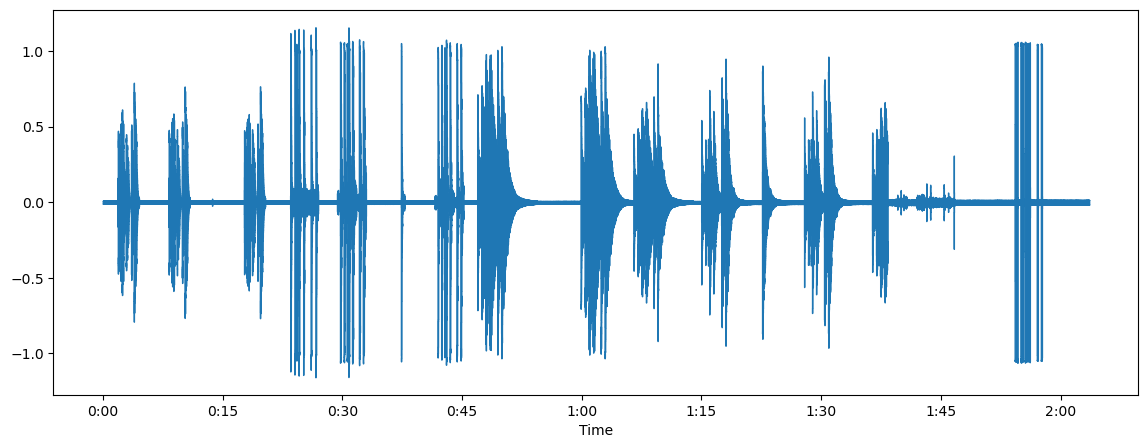

In [6]:
plt.figure(figsize=(14, 5))
librosa.display.waveshow(x, sr=sr)

# **Audio Segmentation**

see also:
https://scikit-maad.github.io/_auto_examples/1_basic/plot_find_rois_simple.html

In [10]:
#!pip install scikit-maad

/home/plastic/anaconda3/envs/tf/lib/python3.10/site-packages/maad/util/miscellaneous.py:413: RuntimeWarning: divide by zero encountered in log10
  y = 10*log10(x)   # take log


<AxesSubplot:xlabel='Time [s]', ylabel='Frequency [Hz]'>

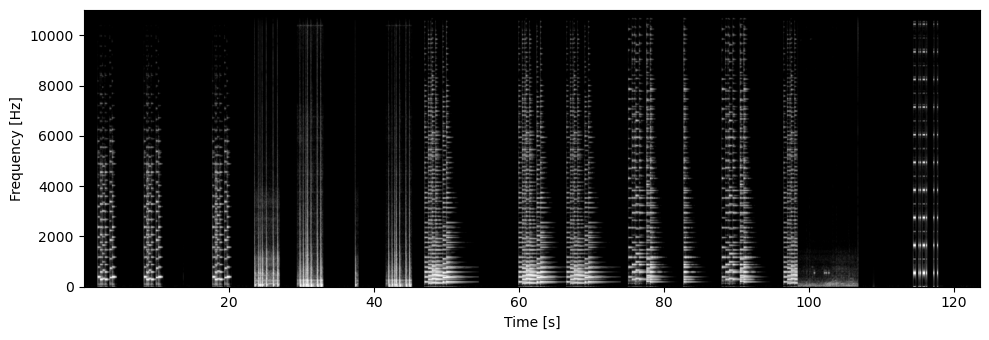

In [11]:
from maad import sound
from maad.rois import find_rois_cwt
from maad.util import plot_spectrogram

Sxx, tn, fn, ext = sound.spectrogram(x, sr, nperseg=1024, noverlap=512)
plot_spectrogram(Sxx, extent=ext, db_range=60, gain=20, colorbar=False, figsize=(2.5,10))

/home/plastic/anaconda3/envs/tf/lib/python3.10/site-packages/maad/util/miscellaneous.py:413: RuntimeWarning: divide by zero encountered in log10
  y = 10*log10(x)   # take log


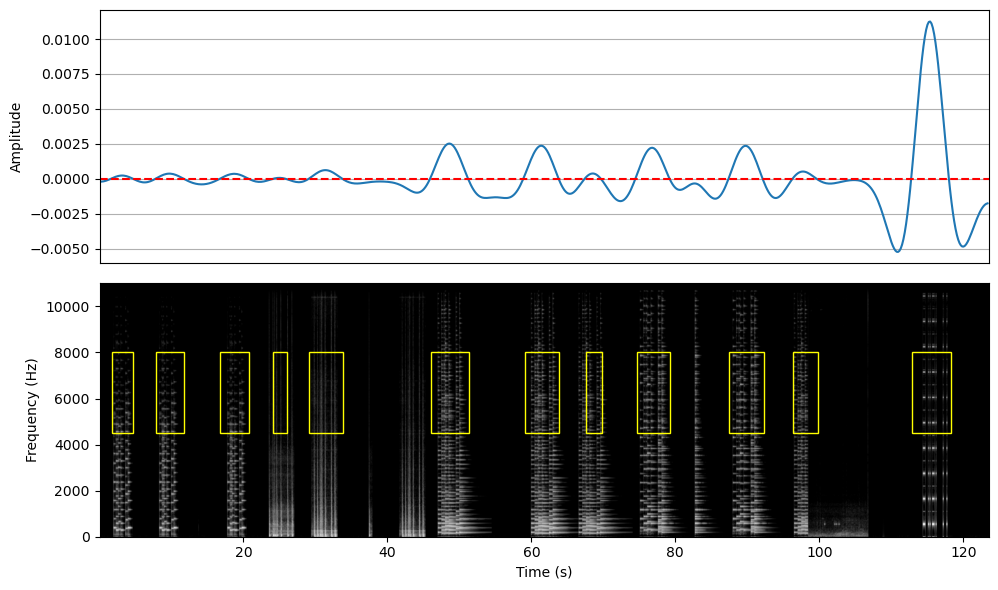

     min_f      min_t   max_f      max_t
0   4500.0    1.67184  8000.0    4.64399
1   4500.0    7.80190  8000.0   11.70286
2   4500.0   16.71837  8000.0   20.80508
3   4500.0   24.14875  8000.0   26.00635
4   4500.0   29.16426  8000.0   33.80825
5   4500.0   46.06839  8000.0   51.26966
6   4500.0   59.07156  8000.0   63.90132
7   4500.0   67.61651  8000.0   69.84562
8   4500.0   74.67537  8000.0   79.31937
9   4500.0   87.49279  8000.0   92.32254
10  4500.0   96.40925  8000.0   99.75293
11  4500.0  112.94186  8000.0  118.32889


In [20]:
df_trill = find_rois_cwt(x, sr, flims=(4500,8000), tlen=5, th=0, display=True, figsize=(10,6))
print(df_trill)